# Data Pre Processing

Steve Pittard wsp@emory.edu (citations to other sources are inline) 

Data rarely arrives in a form that is directly suitable for use with a modeling method. There are a number of considerations to make such as how to handle missing data, highly correlated variables, and class imbalances - some categories are over or under represented. Additionally, some variables, also known as “features”, will require transformation or will need to be used to create new variables.

Consider the case where the measured data (the numeric data) might be on different scales (e.g. height vs weight). This might result in the need to scale and center the data. Some methods take this into consideration whereas others do not. Suffice it to say that data prep can be an ongoing process that requires a number of experiments before arriving at the best form of data. The same might be true of missing data in which case we migh want to replace them with some kind of value such as the mean, median, or mode. 

We might also seek to reduce the number of features under consideration especially if we have lots of columns. If some smaller subset of all the columns can better represent the variation in the entire data set then why not use them ? Of course, everything comes at a price which means you will have to alter, transform, filter and manipulate data which is where your knowledge of Python will come in. On the other hand, Python provides many functions to help you do the work. In this section we will investigate the following approaches for Data PreProcessing:

    - Missing Values
    - Scaling
    - Low Variance Variables
    - Dimensionality Reduction
    - Binning
    - Handling Categories
    - Best Sequence of Processing Steps

## Feature Engineering vs Feature Selection

We tend to view the above steps as **feature engineering** which is often confused with **feature selection** although the latter typically happens *after* the former. We'll tackle the feature engineering approaches first (well some of them) and then talk about how one might reject or keep certain features when buildign a model.

## Missing Values

This is a frequent situation in real life. Think of patients checking in for clinic visits over time. Sometimes they come for their appointments, sometimes they don’t. Sometimes when they do come, their information has changed or some diagnostic test is repeated with a new result which is entered or not. Or, whomever maintains the patient database, decides to add in some new variables to measure for all patients moving forward. This means that all existing patients will have missing values for those new variables. To see how this manifests practically in predictive learning, consider the following version of the mtcars data frame which has some missing values:

In [222]:
import pandas as pd
url = "https://raw.githubusercontent.com/steviep42/utilities/master/data/mtcars_na.csv"
mtcars_na = pd.read_csv(url)

#
print(mtcars_na.shape)
mtcars_na.head()

(32, 11)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4.0
1,21.0,6,160.0,110,3.90,NaN,17.02,0,1,4,4.0
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1.0
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1.0
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2.0


Now let’s see how many rows have at least one column with a missing value. So we have eight rows in the data frame that contain one or more missing values.

In [223]:
print(mtcars_na.dropna(0).shape)
mtcars_na.dropna(0)

(24, 11)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4.0
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1.0
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1.0
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2.0
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1.0
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4.0
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2.0
10,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4.0
12,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3.0
13,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3.0


In [224]:
# Find the rows where there are missing values
mtcars_na[mtcars_na.isnull().any(axis = 1)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,21.0,6,160.0,110,3.90,NaN,17.02,0,1,4,4.0
8,22.8,4,140.8,95,3.92,NaN,22.90,1,0,4,2.0
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,NaN
11,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,NaN
18,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,NaN
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,NaN
22,15.2,8,304.0,150,3.15,NaN,17.30,0,0,3,NaN
27,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,NaN


In [107]:
# Find the rows where there are NOT missing values
mtcars_na[~mtcars_na.isnull().any(axis = 1)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4.0
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1.0
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1.0
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2.0
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1.0
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4.0
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2.0
10,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4.0
12,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3.0
13,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3.0


In [225]:
# Eliminate columns with missing values
mtcars_na.dropna(1)

,mpg,cyl,disp,hp,drat,qsec,vs,am,gear
0,21.0,6,160.0,110,3.90,16.46,0,1,4
1,21.0,6,160.0,110,3.90,17.02,0,1,4
2,22.8,4,108.0,93,3.85,18.61,1,1,4
3,21.4,6,258.0,110,3.08,19.44,1,0,3
4,18.7,8,360.0,175,3.15,17.02,0,0,3
5,18.1,6,225.0,105,2.76,20.22,1,0,3
6,14.3,8,360.0,245,3.21,15.84,0,0,3
7,24.4,4,146.7,62,3.69,20.00,1,0,4
8,22.8,4,140.8,95,3.92,22.90,1,0,4
9,19.2,6,167.6,123,3.92,18.30,1,0,4


In [226]:
# Find the number of missing values in each column
mtcars_na.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      3
qsec    0
vs      0
am      0
gear    0
carb    6
dtype: int64

#### Selective Removal

If we want, we can eliminate rows that have at least a certain number of missing values. In this example we'll drop only those rows with at least 2 missing values

In [227]:
mtcars_na.dropna(0,thresh=2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4.0
1,21.0,6,160.0,110,3.90,NaN,17.02,0,1,4,4.0
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1.0
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1.0
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2.0
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1.0
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4.0
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2.0
8,22.8,4,140.8,95,3.92,NaN,22.90,1,0,4,2.0
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,NaN


In [111]:
from pandas_profiling import ProfileReport
file = ProfileReport(mtcars_na)

# the following writes out an HTML file you can load in a browser
file.to_file(output_file="output.html")

<img src="pics/missval.png" width ="600" height=600>

### Imputation 

What do we do with these ? It depends on a number of things. How hard is it to get this type of data ? If it’s rare information then we probably want to keep as much of the data as possible. In fact, if most of the data in a given row is present maybe one strategy is to tell whatever modeling method we use to ignore the missing values. Some methods might do this by default without you even asking.

However, if we have plenty of data, we could just filter out any row from the data frame that contains any missing values. In this case we would lose eight rows of data. This is low stakes data but if this were rare or hard to obtain information then we wouldn’t want to do this.

In [228]:
mtcars_nona = mtcars_na.dropna(0)

### Median Approach

What could we do ? Well we could keep all rows even if they contains NAs and then use imputation methods to supply values for the missing information. There are R packages that do this but one quick way to do this without going that route is to replace the missing value in the wt column with the median value for the entire column.

Using median is appropriate when the missing values are of the “missing at random” variety. There might some bias in the data that introduces a “not at random” situation. We’ll look at that case momentarily. Let’s look at a boxplot of the **wt** feature. 

3.44


<AxesSubplot:>

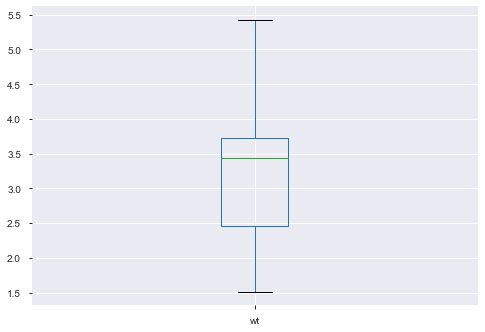

In [229]:
print(mtcars_na.wt.median())
mtcars_na.boxplot(column=['wt'])

It's easy to fill missing values with median, mode, or mean 

In [230]:
mtcars_na['wt']

0     2.620
1       NaN
2     2.320
3     3.215
4     3.440
5     3.460
6     3.570
7     3.190
8       NaN
9     3.440
10    3.440
11    4.070
12    3.730
13    3.780
14    5.250
15    5.424
16    5.345
17    2.200
18    1.615
19    1.835
20    2.465
21    3.520
22      NaN
23    3.840
24    3.845
25    1.935
26    2.140
27    1.513
28    3.170
29    2.770
30    3.570
31    2.780
Name: wt, dtype: float64

In [231]:
mtcars_na['wt'].fillna(mtcars_na['wt'].median())

0     2.620
1     3.440
2     2.320
3     3.215
4     3.440
5     3.460
6     3.570
7     3.190
8     3.440
9     3.440
10    3.440
11    4.070
12    3.730
13    3.780
14    5.250
15    5.424
16    5.345
17    2.200
18    1.615
19    1.835
20    2.465
21    3.520
22    3.440
23    3.840
24    3.845
25    1.935
26    2.140
27    1.513
28    3.170
29    2.770
30    3.570
31    2.780
Name: wt, dtype: float64

In [232]:
mtcars_na['wt'] = mtcars_na['wt'].fillna(mtcars_na['wt'].median())

In [233]:
# Could also do wholale replacement
mtcars_na = mtcars_na.fillna(mtcars_na.median())

# Check number of empty
mtcars_na.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

### All At Once

It's possible to fill all columns with missing values all at once as long as what you are doing makes sense for all columns. For example, using the mode to replace missing values in column of categories is fine although it might not be for a column of numeric data. Here is an example of replacing things all at once.

In [234]:
# Read the file back in
url = "https://raw.githubusercontent.com/steviep42/utilities/master/data/mtcars_na.csv"
mtcars_na = pd.read_csv(url)

# Are there any missing values ? 
print(mtcars_na.isnull().sum())

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      3
qsec    0
vs      0
am      0
gear    0
carb    6
dtype: int64


So we can fill all the missing values in a way that does it **in place** which means the data frame is modified on the spot. Or we can choose to not modify it in place. 

In [235]:
# Change the inplace argument to True if you wish to alter the dataframe on the spot
mtcars_na.fillna(mtcars_na.mean(), inplace=False)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620000,16.46,0,1,4,4.000000
1,21.0,6,160.0,110,3.90,3.223862,17.02,0,1,4,4.000000
2,22.8,4,108.0,93,3.85,2.320000,18.61,1,1,4,1.000000
3,21.4,6,258.0,110,3.08,3.215000,19.44,1,0,3,1.000000
4,18.7,8,360.0,175,3.15,3.440000,17.02,0,0,3,2.000000
5,18.1,6,225.0,105,2.76,3.460000,20.22,1,0,3,1.000000
6,14.3,8,360.0,245,3.21,3.570000,15.84,0,0,3,4.000000
7,24.4,4,146.7,62,3.69,3.190000,20.00,1,0,4,2.000000
8,22.8,4,140.8,95,3.92,3.223862,22.90,1,0,4,2.000000
9,19.2,6,167.6,123,3.92,3.440000,18.30,1,0,4,2.923077


In the above it seems that the **carb** variable has been filled in using the mean function (for that column) when in reality it might be better addressed using the mode of that column since it really doesn't make sense to have a fractional number of carburetors. This is why a more targeted replacement might be the best approach when cleaning data. 

In [236]:
mtcars_na.carb.mode()

0    4.0
dtype: float64

In [237]:
mtcars_na.carb = mtcars_na['carb'].fillna(mtcars_na['carb'].mode()[0])
mtcars_na.carb

0     4.0
1     4.0
2     1.0
3     1.0
4     2.0
5     1.0
6     4.0
7     2.0
8     2.0
9     4.0
10    4.0
11    4.0
12    3.0
13    3.0
14    4.0
15    4.0
16    4.0
17    1.0
18    4.0
19    4.0
20    1.0
21    2.0
22    4.0
23    4.0
24    2.0
25    1.0
26    2.0
27    4.0
28    4.0
29    6.0
30    8.0
31    2.0
Name: carb, dtype: float64

### Package Approach

Python also has functions available that can use more sophisticated methods for imputation such as using regression to predict what a replacement value should be. Another advantage of using one of the function-based imputers is that it can be used with a scikit "pipeline", something we haven't explore yet. For the moment we'll look at some examples. 

The first up is the SimplImputer method which expects us to use an array as opposed to a dataframe. So we have to convert the dataframe to an array. We can then apply the transformation and then turn that back into a pandas data frame. Supported strategies include: mean, median, most frequnet, and constant.

In [238]:
from sklearn.impute import SimpleImputer
import numpy as np

values = mtcars_na.values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# transform the dataset
transformed_values = imp_mean.fit_transform(values)

# 
pd.DataFrame(transformed_values,columns=mtcars_na.columns)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6.0,160.0,110.0,3.90,2.620000,16.46,0.0,1.0,4.0,4.0
1,21.0,6.0,160.0,110.0,3.90,3.223862,17.02,0.0,1.0,4.0,4.0
2,22.8,4.0,108.0,93.0,3.85,2.320000,18.61,1.0,1.0,4.0,1.0
3,21.4,6.0,258.0,110.0,3.08,3.215000,19.44,1.0,0.0,3.0,1.0
4,18.7,8.0,360.0,175.0,3.15,3.440000,17.02,0.0,0.0,3.0,2.0
5,18.1,6.0,225.0,105.0,2.76,3.460000,20.22,1.0,0.0,3.0,1.0
6,14.3,8.0,360.0,245.0,3.21,3.570000,15.84,0.0,0.0,3.0,4.0
7,24.4,4.0,146.7,62.0,3.69,3.190000,20.00,1.0,0.0,4.0,2.0
8,22.8,4.0,140.8,95.0,3.92,3.223862,22.90,1.0,0.0,4.0,2.0
9,19.2,6.0,167.6,123.0,3.92,3.440000,18.30,1.0,0.0,4.0,4.0


A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [239]:
# Read the file back in
url = "https://raw.githubusercontent.com/steviep42/utilities/master/data/mtcars_na.csv"
mtcars_na = pd.read_csv(url)

# Are there any missing values ? 
print(mtcars_na.isnull().sum())

mtcars_na[mtcars_na.isnull().any(axis = 1)]

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      3
qsec    0
vs      0
am      0
gear    0
carb    6
dtype: int64


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,21.0,6,160.0,110,3.90,NaN,17.02,0,1,4,4.0
8,22.8,4,140.8,95,3.92,NaN,22.90,1,0,4,2.0
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,NaN
11,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,NaN
18,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,NaN
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,NaN
22,15.2,8,304.0,150,3.15,NaN,17.30,0,0,3,NaN
27,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,NaN


In [240]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
pd.DataFrame(imp.fit_transform(mtcars_na),columns=mtcars_na.columns)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6.0,160.0,110.0,3.90,2.620000,16.46,0.0,1.0,4.0,4.000000
1,21.0,6.0,160.0,110.0,3.90,2.962048,17.02,0.0,1.0,4.0,4.000000
2,22.8,4.0,108.0,93.0,3.85,2.320000,18.61,1.0,1.0,4.0,1.000000
3,21.4,6.0,258.0,110.0,3.08,3.215000,19.44,1.0,0.0,3.0,1.000000
4,18.7,8.0,360.0,175.0,3.15,3.440000,17.02,0.0,0.0,3.0,2.000000
5,18.1,6.0,225.0,105.0,2.76,3.460000,20.22,1.0,0.0,3.0,1.000000
6,14.3,8.0,360.0,245.0,3.21,3.570000,15.84,0.0,0.0,3.0,4.000000
7,24.4,4.0,146.7,62.0,3.69,3.190000,20.00,1.0,0.0,4.0,2.000000
8,22.8,4.0,140.8,95.0,3.92,3.773246,22.90,1.0,0.0,4.0,2.000000
9,19.2,6.0,167.6,123.0,3.92,3.440000,18.30,1.0,0.0,4.0,3.346947


Another option exists in the form of the KNN imputer which is sensitive to the specific column types. This is a good method when your columns included a mixture of cateogry and numeric data

In [241]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
pd.DataFrame(imputer.fit_transform(mtcars_na),columns=mtcars_na.columns)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6.0,160.0,110.0,3.90,2.6200,16.46,0.0,1.0,4.0,4.0
1,21.0,6.0,160.0,110.0,3.90,3.0300,17.02,0.0,1.0,4.0,4.0
2,22.8,4.0,108.0,93.0,3.85,2.3200,18.61,1.0,1.0,4.0,1.0
3,21.4,6.0,258.0,110.0,3.08,3.2150,19.44,1.0,0.0,3.0,1.0
4,18.7,8.0,360.0,175.0,3.15,3.4400,17.02,0.0,0.0,3.0,2.0
5,18.1,6.0,225.0,105.0,2.76,3.4600,20.22,1.0,0.0,3.0,1.0
6,14.3,8.0,360.0,245.0,3.21,3.5700,15.84,0.0,0.0,3.0,4.0
7,24.4,4.0,146.7,62.0,3.69,3.1900,20.00,1.0,0.0,4.0,2.0
8,22.8,4.0,140.8,95.0,3.92,2.3025,22.90,1.0,0.0,4.0,2.0
9,19.2,6.0,167.6,123.0,3.92,3.4400,18.30,1.0,0.0,4.0,4.0


Unfortunately, naive bayes, decision trees and k-Nearest Neighbors are sensitive to missing values although in R this is not he case. So if you want to use these methods in Python then you will need to develop a strategy for missing values.


In [242]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

mtvals_na = mtcars_na.values

y = mtvals_na[:,0]         # Gets the mpg column
X = mtvals_na[:,1:10]      # Gets everything BUT the mpg column

regressor.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## Scaling

In terms of what methods benefit (or require) you to scale data prior to use, consider that any method that uses the idea of “distance” will require this. This helps address the situation wherein one the size and range of one feature might overshadow another. For example, look at the range of features in the mtcars dataframe. Not only are the variables on different scales (e.g. MPG vs Weight vs Horse Power), a feature such as displacement might over influence a distance calculation when compared to qsec.

             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
2

<AxesSubplot:>

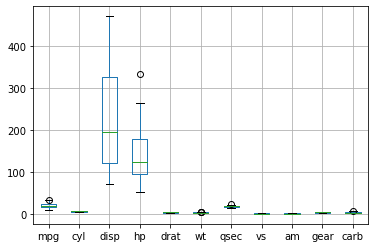

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

print(mtcars.describe())
mtcars.boxplot()

Text(0.5, 1.0, 'UnScaled')

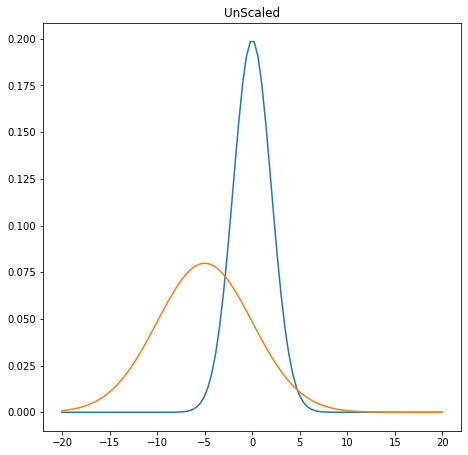

In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-20, 20, 100)
plt.figure(figsize=(7.5,7.5)) 

# Normal distribution with mean 0 and std 2
y1 = norm(0, 2).pdf(x)
plt.plot(x, y1)

# Normal distribution with mean -5 and std 5
y2 = norm(-5, 5).pdf(x)
plt.plot(x, y2)
plt.title("UnScaled")

### Methods

There are at least a couple of ways to scale this data to make it more directly comparable. We could use what's known as **normalization** which generally implies a technique to  “normalize” a variable to be between 0 and 1. This is also called as min-max scaling and scikit has a method for it.

<img src="pics/scaling.png" width ="400" height=400>


Text(0.5, 1.0, 'Scaled')

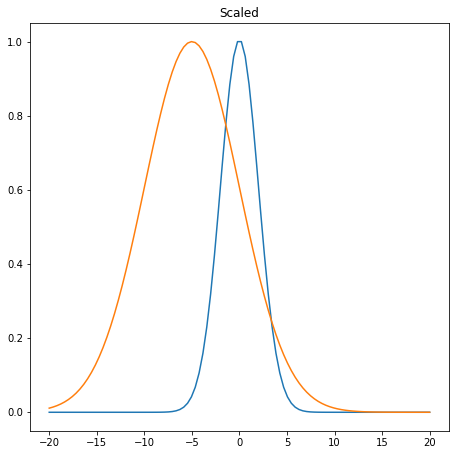

In [6]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

y1_scaled = scale.fit_transform(y1.reshape(-1,1))
y2_scaled = scale.fit_transform(y2.reshape(-1,1))

plt.figure(figsize=(7.5,7.5)) 
plt.plot(x, y1_scaled)
plt.plot(x, y2_scaled)
plt.title("Scaled")

The relationships within each of the data features does not change but the scaling effect makes each feature more directly comparable to all others. There is another type of scaling called **standardization** which is more commonly employed in Data Transformation. The approach is to center the data by subtracting each element from the mean of all related data elements and then dividing by the standard deviation. 

<img src="pics/standard.png" width ="400" height=400>


In [7]:
y1[0:16]

# Get std of y1
print("Std of unscaled data: ",np.std(y1).round(2))

# Get mean of y1
print("Mean of unscaled data: ",np.mean(y1).round(2))

# Let's standardize

def standard(vec):
    center = vec - np.mean(vec)
    std = np.std(vec)
    scaled_data = center / std
    return([scaled_data,center,std])

scaledata, center, std = standard(y1)

print("scaled mean: ",np.mean(scaledata).round(3)," scaled std: ",np.std(scaledata).round(3))

Std of unscaled data:  0.05
Mean of unscaled data:  0.02
scaled mean:  0.0  scaled std:  1.0


But this is unnecessary since there is a Python function tha can help us out with this. 

In [8]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

y1_scaled = scale.fit_transform(y1.reshape(-1,1))
scaledata[0:5] == y1_scaled[0:5]

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

Check out this example which plots the mpg vs wt from mtcars

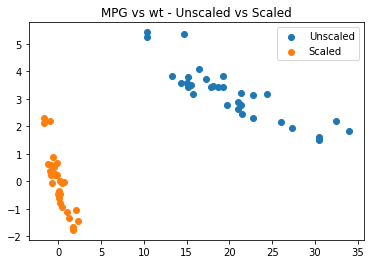

In [9]:
# Plot displacement vs mpg (in blue)
plt.scatter(mtcars.iloc[:, 0], mtcars.iloc[:, 5])

# Now scale the data
mt_std = StandardScaler().fit_transform(mtcars)

# Plot the scaled data to see the effect (in orange)
plt.scatter(mt_std[:, 0], mt_std[:, 5])
plt.title("MPG vs wt - Unscaled vs Scaled")
plt.legend(['Unscaled','Scaled'])

### Methods That Benefit From Scaling

The following approaches benefit from scaling: Linear/non-linear regression, logistic regression, KNN, SVM, Neural Networks, clustering algorithms like k-means clustering. Methods that employ PCA and dimensionality reduction should use scaled data. In R and Python, some of the individual functions might have arguments to activate the scaling as part of the process.

### Methods That Do Not Require Scaling

Methods that don’t require scaling (or whose results don’t rely upon it) include rule-based algorithms such as Decision trees and more generally CART - Random Forests, Gradient Boosted Decision Even if you scale the data the relative relationships will be preserved post scaling so the decision to split a tree won’t be impacted.

Let's look at a couple of examples here to show the imporatance of scaling and how it might impact what it is we are doing 


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y = mtcars.mpg
X = mtcars.drop('mpg',axis=1)

reg = LinearRegression()
reg.fit(X,y)

print("Training RMSE before scaling: ",np.sqrt(mean_squared_error(y,reg.predict(X))))

Training RMSE before scaling:  2.146904967160943


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting means that it generates the necessary parameters 
# (mean, standard deviation) necessary to do the transformation
scaler.fit(mtcars)

# transform applies the actual transformation
scaled_mtcars = scaler.transform(mtcars)

# scaled_mtcars = scaler.fit_transform(mtcars)   # Both at the same time
X = scaled_mtcars[:,1:10]
y = scaled_mtcars[:,0]
reg = LinearRegression()
reg.fit(X,y)

print("Training RMSE after scaling: ",np.sqrt(mean_squared_error(y,reg.predict(X))))

Training RMSE after scaling:  0.36241603536473466


Implementing scaling is not always necessary particularly for methods such as Decision Trees. In general, distance based methods do benefit from scaling and estimators such as Logistic Regression, at least as implemented in schikit, might not converge in absence of scaling. 

Methods that benefit (or require) scaling: K-Nearest Neighbors, Support Vector Machine (RBF kernel), Neural Networks, Regularized Regression, Logisitc Regression (in some cases with scikit)

Methods that don't require scaling: Decision Trees, Random Forests, Boosted Trees, and Linear Regression

Technically, the above example, while valid, is not the best way to proceed when building models when using training and testing data. We want to avoid something called "Data Leakage" which means that we do NOT want the test data (or any charactersitics thereof) to influence the training data. So, in the above example, if we derive a training and testing pair using  X and y, then the scaling of the training data would be influenced by the testing data since the scaling happened before a call to train_test_split. Let's make this clear

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()

# Pick Out the X and y
y = mtcars.mpg
X = mtcars.drop('mpg',axis=1)

# Make the splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# So we are going to scale the X_train data
X_train_scaled = scaler.fit_transform(X_train)

# Train the model using the scaled data
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)

# Now make the test data prediction - the RIGHT way
yhats_right = reg.predict(scaler.transform(X_test))

print("RMSE on correctly scaled test data:",mean_squared_error(y_test,yhats_right)**0.5)

# The wrong way would be
yhats_wrong = reg.predict(scaler.fit_transform(X_test))
print("RMSE on incorrectly scaled test data:",mean_squared_error(y_test,yhats_wrong)**0.5)


RMSE on correctly scaled test data: 3.1827903901745174
RMSE on incorrectly scaled test data: 2.814759173828613


If we scale incorrectly we get a lower RMSE which at first seems attractive. However, because we are doing a scaler **fit** on the test data, the subsequent **transform** will use the mean and standard deviation from the test data rather than the train_date which is what we want. 

## Low Variance Features

Some variables exhibit low variance and might be nearly constant. Such variables can be detected by using some basic functions in R before you begin to build a model. As an example, we’ll use the mtcars data frame and introduce a low variance variable - actually, we’ll make it a constant.

In [251]:
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

print("Variance of mtcars drat: ",np.var(mtcars.drat))
mtcars_nzv = mtcars.copy()

# Make drat low variance
mtcars_nzv.drat = 3.0

# Pretty low isn't it ?
print("Variance of mtcars_nzv drat: ",np.var(mtcars_nzv.drat))

Variance of mtcars drat:  0.27694755859375003
Variance of mtcars_nzv drat:  0.0


What if we use this variable when making a model. We’ll get a lot of problems. While this is a contrived example, it is possible to get this situation when using cross fold validation where the data is segmented into smaller subsets where a variable can be zero variance.

In [252]:
mtcars_nzv.loc[:, mtcars_nzv.std(axis=0) > 0.02]

,mpg,cyl,disp,hp,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.440,18.30,1,0,4,4


In [253]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(mtcars_nzv)

VarianceThreshold()

In [254]:
mtcars_nzv[mtcars_nzv.columns[selector.get_support(indices=True)]]

,mpg,cyl,disp,hp,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.440,18.30,1,0,4,4


## Dimensionality Reduction

So one of the problems with data can be what is called multicollinearity where high correlations exist between variables in a data set. Consider the mtcars data frame for example. Let’s assume that we want to predict whether a given car has an automatic transmission (0) or manual (1). We’ll remove other columns from the data frame that represent categorical data so we can focus on the continuous numeric variables. Let's identify the factors which might represent categories by which we might summarize the continuous quantities.

In [255]:
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [256]:
mtcars.nunique()

mpg     25
cyl      3
disp    27
hp      22
drat    22
wt      29
qsec    30
vs       2
am       2
gear     3
carb     6
dtype: int64

Let’s eliminate cyl,vs,gear, am and carb since they appear to be categories. Then we'll look at the correlation matrix to see if we have highly correlated variables. We do have several correlations that exceed .7 which is sufficiently high to consider that they might cause problems when building models.

<AxesSubplot:>

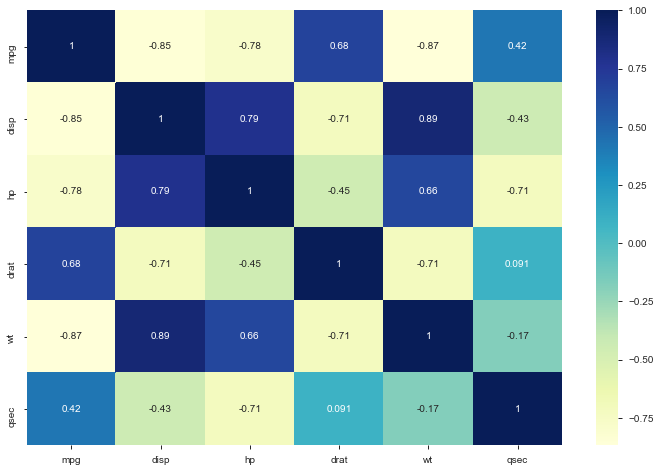

In [257]:
mtcars_nocat = mtcars.drop(['cyl','gear','vs','carb','am'], axis=1)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)

import seaborn as sns
sns.heatmap(mtcars_nocat.corr(), annot=True, cmap="YlGnBu")

There are several functions for doing Principal Components Analysis on this data. But why are we even thinking about PCA ? Well, it helps us deal with highly correlated data by reducing the dimensionality of a data set. In the mtcars data frame we don’t have that many variables / columns but wouldn’t it be nice to transform the data in a way that reduced the number of columns that we had to consider while also dealing with the multicollinearity ? This is what PCA can do for us. In reality we are using the eigenvectors of the covariance matrix of the original data. We use them to transform the original data into a reduced number of columns to consider. 

## PCA By Hand

In [258]:
import scipy.linalg as la
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_mtcars_nocat = scaler.fit_transform(mtcars_nocat)
scaled_mtcars_nocat = pd.DataFrame(scaled_mtcars_nocat)
decomp = la.eig(scaled_mtcars_nocat.cov())


In [259]:
# See https://www.math.ubc.ca/~pwalls/math-python/linear-algebra/eigenvalues-eigenvectors/
# These are the Eigenvalues for each of the eigenvectoessum()
decomp[0]

array([4.32247378+0.j, 1.185148  +0.j, 0.3441101 +0.j, 0.0536549 +0.j,
       0.15933992+0.j, 0.12882169+0.j])

In [260]:
# Here are the eigenvectors which correspond to each of the eigenvalues
decomp[1]

array([[ 0.4586835 , -0.05867609, -0.19479235, -0.35249327,  0.78205878,
         0.1111533 ],
       [-0.46603536,  0.06065296,  0.09688406,  0.56825752,  0.60001871,
        -0.29462973],
       [-0.42585339, -0.36147576,  0.14613554, -0.04771555,  0.12301873,
         0.80574077],
       [ 0.36709629, -0.43652537,  0.80049152,  0.11277675,  0.02259258,
        -0.14377143],
       [-0.43861791,  0.29953457,  0.41776208, -0.6924604 ,  0.10438337,
        -0.23015413],
       [ 0.25283199,  0.76284877,  0.34059066,  0.24152663,  0.04268124,
         0.42187549]])

In [261]:
# Now we look at the product of scaled_mtcars_nocars and the eigenvectors
pcas = scaled_mtcars_nocat @ decomp[1] 

# Here is the transformed data in terms of "Prinicpal Components"
pcas.head()

,0,1,2,3,4,5
0,0.856063,-0.887446,-0.231931,-0.053786,-0.380261,-0.523471
1,0.820425,-0.565244,-0.012870,-0.160237,-0.339033,-0.450087
2,1.712007,0.040647,-0.158998,0.109282,-0.412208,0.033939
3,0.097988,1.315089,-0.579354,0.184643,0.256112,0.043952
4,-1.312175,0.006621,-0.533476,0.295168,0.489021,-0.130273


## Using the PCA Decomposition in scikit

So there is a function that can do the above for us. We can also select some number of components in advance with the idea that maybe we can use the transformed data and select perhaps two of the compontents since it might represent most of the variance in the data. 
This function, PCA, behaves like other "fit and transform" functions in scikit.

In [265]:
from sklearn.decomposition import PCA

# Select some number of components
pca = PCA(n_components=2) 
components = pca.fit_transform(scaled_mtcars_nocat) 

# 
componentsDf=pd.DataFrame(data=components,
                          columns=['PC 1','PC 2']) 
componentsDf.head()

# The below should match what we generated by hand above

,PC 1,PC 2
0,0.856063,0.887446
1,0.820425,0.565244
2,1.712007,-0.040647
3,0.097988,-1.315089
4,-1.312175,-0.006621


In [267]:
print("Percent Variance Explained Per Component:",pca.explained_variance_ratio_)

Percent Variance Explained Per Component: [0.69789941 0.19135202]


In [269]:
print("Two PCAs account for: ",sum(pca.explained_variance_ratio_).round(2),"% variance in the data")

Two PCAs account for:  0.89 % variance in the data


In [270]:
# look at explainded variance of PCA components 
# See https://medium.com/@sarayupgouda/pca-principal-component-analysis-in-python-f9836c25acb9

exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))

if n_components= 0,   variance=69.790000
if n_components= 1,   variance=88.930000


Next we'll look at the accuracy resulting from a Naive Bayes model which first uses the 2 components emerging from the call to the PCA function. Then we'll compare it to the results we get from using just the scaled numeric data from mtcars which has not been reduced via PCA. 

In [271]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(componentsDf, 
                                                    mtcars.am, 
                                                    test_size=0.3, 
                                                    random_state=0)
gnb_pca = GaussianNB()
y_pred = gnb_pca.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 10 points : 0


In [272]:
X_train, X_test, y_train, y_test = train_test_split(scaled_mtcars_nocat, 
                                                    mtcars.am, 
                                                    test_size=0.3, 
                                                    random_state=0)
gnb_nopca = GaussianNB()
y_pred = gnb_nopca.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 10 points : 2


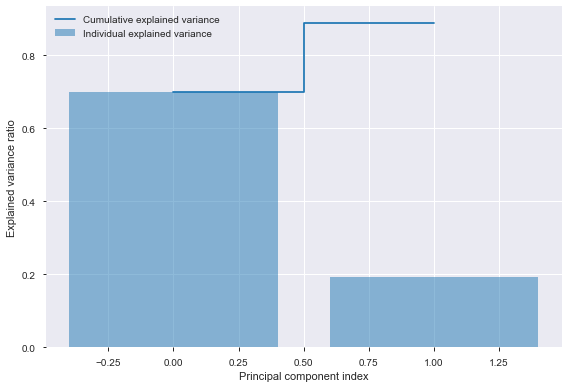

In [273]:
# See https://vitalflux.com/pca-explained-variance-concept-python-example/
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

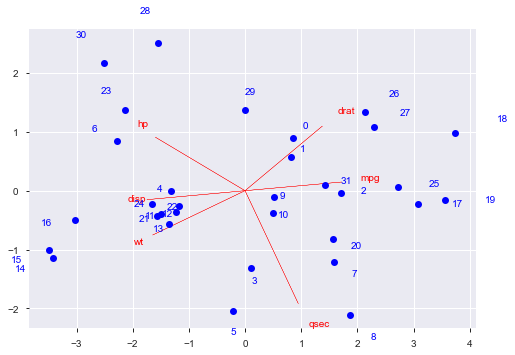

In [274]:
# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(scaled_mtcars_nocat)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(scaled_mtcars_nocat)[:,1]


## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(mtcars_nocat.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(scaled_mtcars_nocat.index)[i], color='b')

plt.show()

### Summary

So the advantages of PCA should be clear in this case. We have effectively replaced the original data by a smaller data set while also dealing with the correlation issues. We used only two components. Now, a disadvantage here is that the model with the transformed data is in terms of the components which means that the model is less transparent. Perhaps a minor price to pay for better accuracy.

## Order Of Processing 

In reality, if we wanted to line up the order in which to pre process data it would read something like the following:

    - Remove Near Zero Variance Features
    - Do Imputation (knn or median)
    - Center
    - Scale
    - Dimensionality Reduction

## Handling Categories

If you haven’t already, you should first read the section on “Levels Of Measurement” to reacquaint yourself with the differences between Nominal, Ordinal, Interval, and Ratio data.

In this section we’ll deal with categories and factors which represent categories (e.g. “male”,“female”,“smoker”,“non-smoker”). These variables, while useful, need to be recoded in a way to make them useful for machine learning methods. In terms of categories, we have nominal and ordinal features with the former being names or labels and the latter being the same except with some notion of order (e.g. “low”,“medium”,“high”).

### Examples

In R, you can usually create a factor out of a feature and R will handle it correctly when applying a machine learning method. Under the hood, it turns the factors into dummy variables. Notice how the model creates variables of the type cyl6 and cyl8. Where is cyl4 ? Well, absence of cyl4 is simply when cyl6 and cyl8 do not exist for that record. In Python you have to handle this yourself which can be a bit confusing for anyone coming from an R background. 

One way to handle this is to identify what the potential factors are in your data and convert those to a type of **object**. We did this with mtcars in the previous section wherein we decided to remove 'cyl','gear','vs','carb','am' from the data frame so we could scale the remaining data for use with PCA. We want to map categorical variables while ensuring that the variables are independent.

In [275]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


So let's illustrate how important the concept of factors vs non factors is. Let's first see how many unique values each columns assumes. Those that assume only a handful of values are cadnidates for one-hot or dummy encoding. From the following, it appears that we have about 4 or maybe 5 features that might be factors / categories. 

In [276]:
mtcars.nunique().sort_values()

vs       2
am       2
cyl      3
gear     3
carb     6
hp      22
drat    22
mpg     25
disp    27
wt      29
qsec    30
dtype: int64

The reason we make such a big deal out of this is because, depending on the method we use, the "levels" of a category might be treated differently. We also migh want to make finer grained distinctions, for example, as to whether the values of the cylinder variable (4,6, or 8) are all equally significant or it's just one level that matters. Let's do a baseline regression here without encoding any variables. 

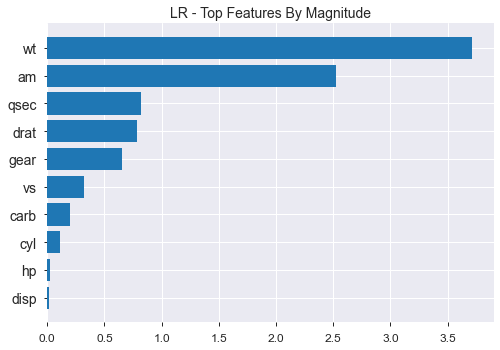

In [277]:
X = mtcars.drop('mpg',axis=1)
y = mtcars.mpg

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

importance = lin_reg.coef_
    
absvals = np.abs(importance)
sorted_idx = absvals.argsort()

hold = sorted_idx.tolist()
hold.reverse()

plt.barh(X.columns[sorted_idx], absvals[sorted_idx])
plt.title("LR - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

We see am, one possible factor, is important though cyl and vs are less important when taken as mere numeric values. Let's dummy them up and repeat our regression.

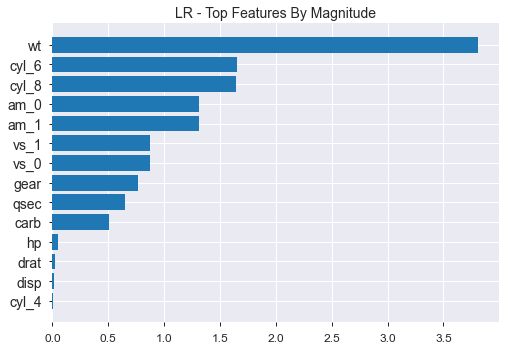

In [278]:
mtcars_2 = pd.get_dummies(mtcars,columns=['cyl','am','vs']).copy()

X = mtcars_2.drop('mpg',axis=1)
y = mtcars_2.mpg

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.score(X,y)

importance = lin_reg.coef_
    
absvals = np.abs(importance)
sorted_idx = absvals.argsort()

hold = sorted_idx.tolist()
hold.reverse()

plt.barh(X.columns[sorted_idx], absvals[sorted_idx])
plt.title("LR - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

This is illuminating in that 6 and 8 cylinder cars are important when determining the ultimate MPG for an observation - over and above tranmission types. Relative to transmission types it doesn't seem to matter if the type is automatic or manual. Let's look at the effect of dummied variables on the RMSE. 

In [279]:
# Making dummy vars is an easy process
dummied_mt = pd.get_dummies(mtcars,columns=['cyl','vs'])
dummied_mt.head()

,mpg,disp,hp,drat,wt,qsec,am,gear,carb,cyl_4,cyl_6,cyl_8,vs_0,vs_1
0,21.0,160.0,110,3.90,2.620,16.46,1,4,4,0,1,0,1,0
1,21.0,160.0,110,3.90,2.875,17.02,1,4,4,0,1,0,1,0
2,22.8,108.0,93,3.85,2.320,18.61,1,4,1,1,0,0,0,1
3,21.4,258.0,110,3.08,3.215,19.44,0,3,1,0,1,0,0,1
4,18.7,360.0,175,3.15,3.440,17.02,0,3,2,0,0,1,1,0


In [280]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y = dummied_mt.mpg
X = dummied_mt.drop('mpg',axis=1)

reg = LinearRegression()
reg.fit(X,y)

print("Training RMSE before scaling: ",
      np.sqrt(mean_squared_error(y,reg.predict(X))))

Training RMSE before scaling:  2.0411658075864874


Is this different from what we did earlier when we creaed a linear model with the unprocessed data ? 

In [281]:
y = mtcars.mpg
X = mtcars.drop('mpg',axis=1)

reg = LinearRegression()
reg.fit(X,y)

print("Training RMSE before scaling: ",np.sqrt(mean_squared_error(y,reg.predict(X))))

Training RMSE before scaling:  2.146904967160943


What happens if we encode some other columns that we believe are actually categories ? Let's dummy up the **carb** column. We do see some improvement so it can add up. 

In [282]:
# Making dummy vars is an easy process
dummied_mt = pd.get_dummies(mtcars,columns=['cyl','vs','carb'])
dummied_mt.head()

y = dummied_mt.mpg
X = dummied_mt.drop('mpg',axis=1)

reg = LinearRegression()
reg.fit(X,y)

print("Training RMSE before scaling: ",np.sqrt(mean_squared_error(y,reg.predict(X))))

Training RMSE before scaling:  1.9399047707686214


### Admissions Data

As an example, read in the following data which relates to admissions data for students applying to an academic program. This comes from UCLA Statisitical Consulting site. 

Let’s examine this data by determining the number of unique values assumed by each feature. This helps us understand if a variable is a category / factor variable or a continuous quantity. It appears that admit takes on only two distinct values and rank assumes only four which suggests that both might be more of a category than a quantity upon which we could perform lots of calculations. 

As it relates to admit, this is a yes / no assessment and there is no inherent order even though it has been encoded as a 0 or a 1. This might be something that we might predict with a model.

We will treat the variables gre and gpa as continuous. The variable rank takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

In [283]:
admissions = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
print(admissions.head(),"\n")

# Check the number of unique values assumed by each columns
admissions.nunique()

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4 



admit      2
gre       26
gpa      132
rank       4
dtype: int64

So with this data, an interesting problem might be to predict whether an applicant is admitted to the program based on the other variables in the data set. We could pick a Decision Tree for this activity.

In [284]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

X = admissions.drop('admit',axis=1)
y = admissions.admit

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=0)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        65
           1       0.46      0.49      0.47        35

    accuracy                           0.62       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.63      0.62      0.62       100



In [285]:
dummied_admissions = pd.get_dummies(admissions,columns=['rank'])
dummied_admissions.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [286]:
X = dummied_admissions.drop('admit',axis=1)
y = dummied_admissions.admit

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=0)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71        65
           1       0.49      0.54      0.51        35

    accuracy                           0.64       100
   macro avg       0.61      0.62      0.61       100
weighted avg       0.65      0.64      0.64       100



Some of the metrics look better. 

## Binning

Sometimes we have data that spans a range of values such that it might make more sense to “bin” or collect the values into “buckets” represented by categories. This is akin to what a histogram does. Look at the PimaIndiansDiabetes data set for an example. Specifically, look at the pregnant feature in the form of a histogram. Most of those surveyed had less than 5 pregnancies although there are those who had at least that number of pregnancies and more. It also looks like those with diabetes had more subjects with a higher number of preganncies than in negative cases. 


pm dimensions: (768, 9)


<AxesSubplot:>

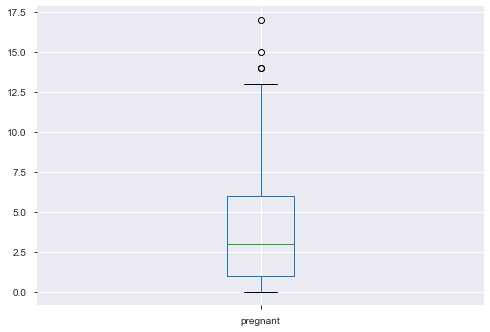

In [287]:
url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/pima.csv"
pm = pd.read_csv(url, sep=',')

# Get the dimensions
print("\npm dimensions:",pm.shape)

# See what data we have
pm.boxplot("pregnant")

array([<AxesSubplot:title={'center':'neg'}>,
       <AxesSubplot:title={'center':'pos'}>], dtype=object)

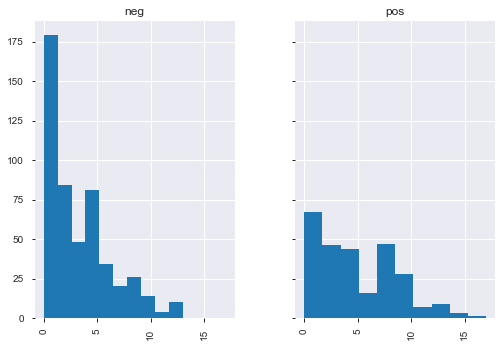

In [288]:
pm.hist('pregnant',by='diabetes',sharex=True,sharey=True)

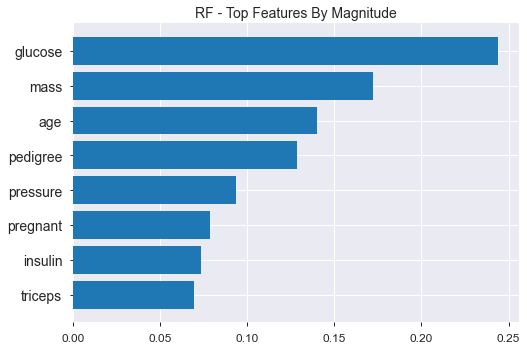

In [289]:
## Variable Importance From Decision Trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Specify the predictor data 
X = pm.iloc[:,0:8]

# Specify the target labels and flatten the array to make it consumable
# by scikit-learn functions

y = np.ravel(pm.diabetes)

# Scale the predictor data
# X_scaled = preprocessing.scale(X)

# Import the train / test module
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.20,random_state=0)

rf.fit(X_train, y_train)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("RF - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

What happens if we bin the pregancy variable into 4 groups ?

In [290]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=3,encode='ordinal', strategy='uniform')
tf_preg = pm.pregnant.values.reshape(-1,1)
est.fit(tf_preg)
Xt = est.transform(tf_preg)

for i in range(0,20):
    print("Unbinned val: ",pm.pregnant[i],"Binned val: ",Xt[i])

Unbinned val:  6 Binned val:  [1.]
Unbinned val:  1 Binned val:  [0.]
Unbinned val:  8 Binned val:  [1.]
Unbinned val:  1 Binned val:  [0.]
Unbinned val:  0 Binned val:  [0.]
Unbinned val:  5 Binned val:  [0.]
Unbinned val:  3 Binned val:  [0.]
Unbinned val:  10 Binned val:  [1.]
Unbinned val:  2 Binned val:  [0.]
Unbinned val:  8 Binned val:  [1.]
Unbinned val:  4 Binned val:  [0.]
Unbinned val:  10 Binned val:  [1.]
Unbinned val:  10 Binned val:  [1.]
Unbinned val:  1 Binned val:  [0.]
Unbinned val:  5 Binned val:  [0.]
Unbinned val:  7 Binned val:  [1.]
Unbinned val:  0 Binned val:  [0.]
Unbinned val:  7 Binned val:  [1.]
Unbinned val:  1 Binned val:  [0.]
Unbinned val:  1 Binned val:  [0.]


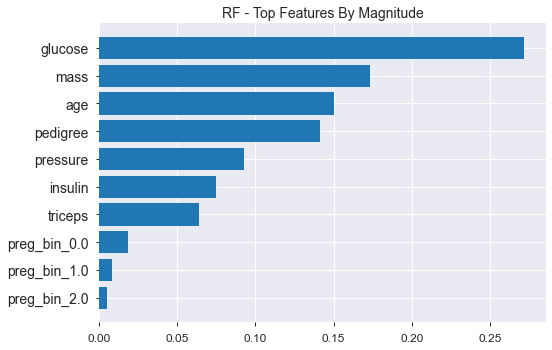

In [291]:
# Specify the predictor data 
X = pm.iloc[:,0:8]

# Specify the target labels and flatten the array to make it consumable
# by scikit-learn functions

y = np.ravel(pm.diabetes)

X['preg_bin'] = Xt

X = X.drop('pregnant',axis=1)
X = pd.get_dummies(X,columns=['preg_bin'])

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.20,random_state=0)

## 
rf.fit(X_train, y_train)
rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("RF - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)


preg_bin_0.0 2.31806
preg_bin_1.0 1.61057
pedigree   0.81482
preg_bin_2.0 0.48754
mass       0.06292
glucose    0.02911
pressure   0.01618
age        0.00502
insulin    0.00091
triceps    0.00075


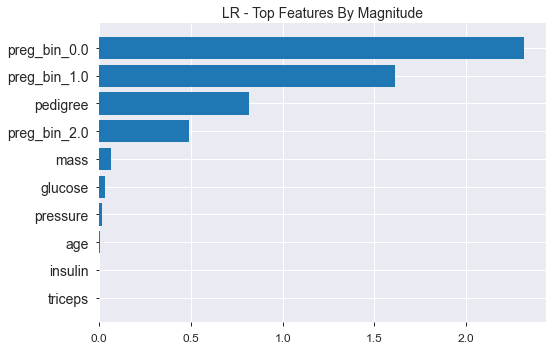

In [292]:
# Create a Logitic Regression Model 
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

importance = logit_model.coef_[0]
absvals = np.abs(importance)
sorted_idx = absvals.argsort()

hold = sorted_idx.tolist()
hold.reverse()

for i in hold:
    print('%-10s %.5f' % (X.columns[i],absvals[i]))

plt.barh(X.columns[sorted_idx], absvals[sorted_idx])
plt.title("LR - Top Features By Magnitude",fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=14)

## Feature Selection

Thus far we haven't given much attention to the issue of determining which of the features are the most important to building a highly accurate/senstive/specific model. We did look at correlations which can provide clues about which variables might be proxy for others. 

We also look at PCA to transform the entire dataset in a way that it captures most of the variation in a reduced feature set. There are other ways to selec the "best" features using some univariate statistics and the sklearn.feature_selection module can be used for feature selection. Let's look at the **SelectKBest** function as applied to the Pima Indians Dataset.

In [293]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = pm.iloc[:,0:8]
y = pm.diabetes

# Let's request the 5 "best" features

new = SelectKBest(chi2,k=5).fit(X,y)
print("Column numbers which correspond to 5 best features ",new.get_support(indices=True))
X_new = pm.iloc[:,new.get_support(indices=True)]
X_new.head()

Column numbers which correspond to 5 best features  [0 1 4 5 7]


,pregnant,glucose,insulin,mass,age
0,6,148,0,33.6,50
1,1,85,0,26.6,31
2,8,183,0,23.3,32
3,1,89,94,28.1,21
4,0,137,168,43.1,33


In [294]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,
                                                    test_size=0.20,random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Model with 5 best features: ",rf.score(X_test,y_test).round(2))

# Compare to a full model
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,random_state=0)
rf.fit(X_train, y_train)
print("Model with all features: ",rf.score(X_test,y_test).round(2))

Model with 5 best features:  0.8
Model with all features:  0.81


Note that we could also get back the scores from the SelectKBest function and put them into a datra frame for more flexibility.

<AxesSubplot:xlabel='feature'>

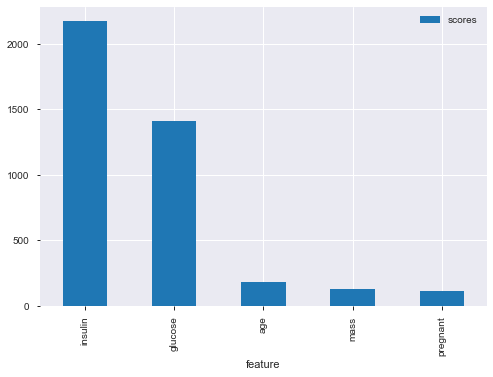

In [295]:
dfscores = pd.DataFrame(new.scores_,columns=['scores'])
dfcolnam = pd.DataFrame(X_train.columns,columns=['feature'])

# Create a dataframe
features_rank = pd.concat([dfscores,dfcolnam],axis=1)
top5 = features_rank.nlargest(5,'scores')

#features_rank.sort_values(by=['scores'],axis=1)
top5.plot.bar(x='feature',y='scores')

### RFECV

There is a function which uses cross-validation to help arrive at the a feature ranking which might be more robust than using the univariate method. We can actually select a modeling method to help us pick the right feature set. In the example below which comes from the scikit-learn manual, the Support Vector Machine is used to help select the optimal feature set across 4 folds. The output tells us that using 4 features provides the best accuracy. The **RFECV** function helps with this. 


['pregnant', 'glucose', 'insulin', 'mass', 'age']


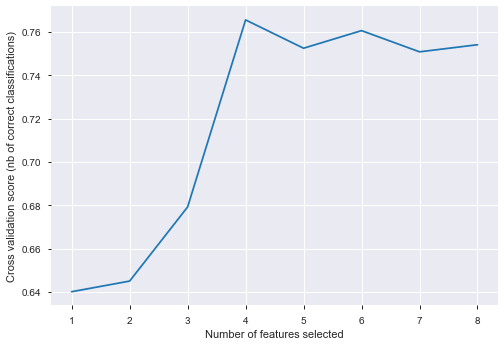

In [296]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=KFold(4),
              scoring='accuracy')
#
rfecv.fit(X_train, y_train)
print(X_train.iloc[:,new.get_support(indices=True)].columns.tolist())

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Feature Importance Reprise

We've already seen that Decision Trees return something called feature importance. We'll look at the ExtaTreesClassifier which 

> implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [297]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()    # Accept defaults
model.fit(X_train,y_train)
model.score(X_test,y_test).round(2)

0.78

<AxesSubplot:>

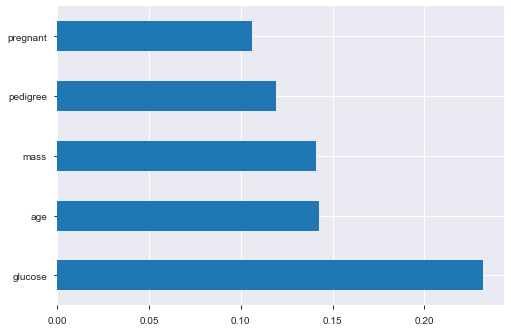

In [298]:
ranked_f = pd.Series(model.feature_importances_,index=X_train.columns)
ranked_f.nlargest(5).plot(kind="barh")

## Mutual Information Gain

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [299]:
from sklearn.feature_selection import mutual_info_classif 

mutual_info = mutual_info_classif(X_train,y_train)
mutual_data = pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

glucose     0.098558
mass        0.073714
age         0.047217
triceps     0.025383
pregnant    0.018026
insulin     0.017533
pressure    0.002609
pedigree    0.000000
dtype: float64

## Pipeline

While this section is not considered Pre Processing per se, it is an approach that is used to ease the processing of data prior to use in the construction of a model. It can be easy, for example, to forget to scale some data when making a training and test pair. It might be more convenient to create a **pipeline** to handle this for you. Not everything can fit into a pipeline but scikit learn has many methods that can many of which involve the type sof pre-processing we have been discussing in this chapter. Let's start simple with a data scaling situation. We've already seen this in above examples but let's reintroduce it here. 

In [300]:
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/mtcars.csv"
mtcars = pd.read_csv(url)


scaler = StandardScaler()

# Get the X vals
X = mtcars.iloc[:,1:10]
X_scaled = scaler.fit_transform(X)

# Get y (note, we won't scale so as not to lose units in prediction)
y = mtcars.iloc[:,0]

# Create and fit a model
reg = LinearRegression()
reg.fit(X_scaled,y.values.ravel())

# Do a prediction
yhats = reg.predict(X_scaled)
print("Training RMSE after scaling: ",np.sqrt(np.abs(mean_squared_error(y,yhats))))

Training RMSE after scaling:  2.149862632011449


So let's do this again although we will use the PipeLine function. While we are at it, we'll do some scaling, PCA reduction, and then build a model. 

In [301]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Scale -> PCA -> Linear Regression  
pipe = Pipeline([('std', StandardScaler()),
                 ('pca', PCA(n_components = 2)),  
                 ('lr', LinearRegression())], verbose = True) 

# fitting the data in the pipe 
pipe.fit(X_train, y_train) 
  
# scoring data  
yhat = pipe.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(yhat, y_test)).round(3))


[Pipeline] ............... (step 1 of 3) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.0s
RMSE:  2.921


In [302]:
from sklearn.linear_model import LinearRegression
lmreg  = LinearRegression()

X = mtcars.drop('mpg',axis=1)
y = mtcars.mpg 

X_train, X_test, y_train, y_test = train_test_split(X,y)

# Scale -> PCA -> Linear Regression  
pipe = Pipeline([('std', StandardScaler()),
                 ('pca', PCA(n_components = 2)),  
                 ('lr', LinearRegression())], verbose = True) 

results = cross_validate(pipe, 
                         X_train, 
                         y_train, 
                         cv=3, 
                         scoring='neg_mean_squared_log_error')

[Pipeline] ............... (step 1 of 3) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.0s
[Pipeline] ............... (step 1 of 3) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.0s
[Pipeline] ............... (step 1 of 3) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.0s


In [303]:
scaled_rmse = np.sqrt(np.mean(np.abs(results['test_score'])))

# scoring data  
yhat = pipe.fit(X_test,y_test).predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(yhat, y_test)).round(3))

[Pipeline] ............... (step 1 of 3) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing pca, total=   0.0s
[Pipeline] ................ (step 3 of 3) Processing lr, total=   0.0s
RMSE:  3.09


In [304]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(pm.drop('diabetes',axis=1))
# select all rows that are not outliers

print("There are %d samples suspected of being outliers \n" % np.sum(yhat == -1))

There are 21 samples suspected of being outliers 



In [305]:
outlier_pm = pm[yhat == -1]
outlier_pm

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
9,8,125,96,0,0,0.0,0.232,54,pos
13,1,189,60,23,846,30.1,0.398,59,pos
62,5,44,62,0,0,25.0,0.587,36,neg
75,1,0,48,20,0,24.7,0.140,22,neg
106,1,96,122,0,0,22.4,0.207,27,neg
125,1,88,30,42,99,55.0,0.496,26,pos
145,0,102,75,23,0,0.0,0.572,21,neg
177,0,129,110,46,130,67.1,0.319,26,pos
182,1,0,74,20,23,27.7,0.299,21,neg
228,4,197,70,39,744,36.7,2.329,31,neg
